# CoderHouse - Grupo 7 - Segunda Entrega Proyecto Final

* <b>Profesor:</b> David Romero Acosta

* <b>Tutoria:</b> Hector Ponce Schwarz

<b>Alumnos:</b>
* Juan Pascual
* Lucas Ariel Saavedra
* Bartolome Oscar Meritello
* Jose Mornaghi


# Tabla de Contenidos
1. Plan de Investigacion
2. Analisis Univariado
3. Analisis Bivariado
4. Analisis Multivariado
5. Modelos de clasificacion

# Plan de Investigacion y Objetivos

El objetivo principal de este trabajo es predecir si un individuo sufrirá un accidente cerebrovascular (Stroke) o no. Para esto obtuvimos información de un dataset tomado de Kaggle (https://www.kaggle.com/) e intentamos responder a ciertas preguntas cómo:
* ¿La edad impacta en las probabilidades de sufrir esta enfermedad?
* ¿El estilo de vida de una persona la podría inducir a sufrir esta dolencia?
    * ¿En que medida respecto a la edad por ejemplo?
    * ¿Ser fumador influye en la misma?
    * ¿El nivel de glucosa en sangre?
    * ¿El indice de masa corporal?
    * ¿El tipo de trabajo?
* ¿Los hombres son más propensos a sufrir un ACV?
* ¿El lugar de residencia de una persona podría influir?
* Padecer de hipertensión o haber sufrido un ataque al corazón aumentan el riesgo, ¿Es esto cierto?

Antes de continuar con el análisis de la información debemos hacer enfásis en preguntarnos:
* [¿Qué es un ACV (stroke)?](https://www.stroke.org/en/about-stroke)
* [¿Cómo podemos prevenirlo?](https://www.hospitalaleman.org.ar/prevencion/acv-como-prevenirlo/)

## Descripción del DataSet

El dataset utilizado presenta 12 variables, 11 de las cuales nos ayudarán (o no) a responder las preguntas planteadas previamente entorno a la variable objetivo "Stroke". A continuación describiremos brevemente cada una de estas variables, algunas categoricas y algunas numéricas:

* id: número identificatorio del individuo.
* gender: género del individuo estudiado (masculino, femenino)
* age: edad del indidividuo
* hypertension: parámetro de salud relacionado. ¿El individuo tiene hipertensión? Posibles respuestas: Si (1), No (0).
* heart_disease: parámetro de salud relacionado. ¿El individuo tiene alguna enfermedad cardíaca? Posibles respuestas: Si (1), No (0).
* ever_married: estado civil del individuo. ¿Está casado? Si, No.
* work_type: tipo de trabajao del individuo. Se toma en consideración la posibilidad de que el mismo sea un niño y en ese caso se lo marca como tal. Posibles respuestas: Privado, 'Self-employed', 'Govt_job', Niño, 'Never_worked'.
* Residence_type: parámetro personal, tipo de residencia del individuo distinguiendo entre zona Urbana o Rural.
* avg_glucose_level
* smoking_status: parámetro de salud relacionado. ¿Es fumador el individuo? Posibles respuestas: Si (1), No (0).
* bmi: parámetro de salud relacionado. Indice de masa del individuo.
* stroke: variable 'Target' u Objetivo. ¿La persona sufrió un Stroke?

## Importación de las Librerías Necesarias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

warnings.filterwarnings("ignore")

## Vistazo inicial del DataSet

In [6]:
stroke_dataset = pd.read_csv("stroke.csv")
stroke_dataset

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [7]:
frequencyTable(stroke_dataset, 'stroke')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      4861           4861     95.1272          95.1272
1       249           5110      4.8728         100.0000

## Reprocesamiento inicial de los Datos - Buscando Nan Values

En principio replanteamos el DataSet sacando el dato ID ya que será totalmente irrelevante para nuestro análisis.

In [8]:
stroke_dataset = stroke_dataset.drop("id", axis=1)

Desplegamos la info....

In [9]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Obtenemos los datos nulos de las columnas

In [10]:
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Podemos ver que la unica variable que contiene datos NaN (nulos) es la del índice de masa corporal ('bmi').
En base a esta información, imputaremos los datos de la variable BMI con la función KNNImputer. Los valores faltantes de cada muestra se imputan utilizando el valor medio de los vecinos más cercanos de n_neighbors que se encuentran en el conjunto de entrenamiento.

In [11]:
imputador = KNNImputer(n_neighbors=3, weights="uniform")
stroke_dataset['imputed_bmi'] = imputador.fit_transform(stroke_dataset[['bmi']])
stroke_dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
imputed_bmi            0
dtype: int64

In [12]:
stroke_dataset.describe()[["bmi", "imputed_bmi"]].T

count       mean       std   min   25%   50%   75%   max
bmi          4909.0  28.893237  7.854067  10.3  23.5  28.1  33.1  97.6
imputed_bmi  5110.0  28.893237  7.698018  10.3  23.8  28.4  32.8  97.6

De ahora en más, trabajaremos con el DataSet con los datos de BMI imputados, creando un nuevo archivo CSV y trabajaremos con el mismo.

In [13]:
stroke_dataset = stroke_dataset.drop("bmi", axis = 1)
stroke_dataset = stroke_dataset.rename(columns={'imputed_bmi': 'bmi'})
stroke_dataset = stroke_dataset.drop(3116)
# Eliminamos un individuo del dataset que no especifico su sexo
stroke_dataset.to_csv("stroke_imputed.csv", index=False)

In [14]:
stroke_dataset = pd.read_csv("stroke_imputed.csv")
stroke_dataset

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5104  Female  80.0             1              0          Yes        Private   
5105  Female  81.0             0              0          Yes  Self-employed   
5106  Female  35.0             0              0          Yes  Self-employed   
5107    Male  51.0             0              0          Yes        Private   
5108  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   smoking_status  stroke        bmi  
0             Urban             228.69  formerly smoked       1  36.600000  
1             Rural             202.21     never smoked       1  28.893237  
2             Rural             105.92     never smoked       1  32.500000  
3             Urban             171.23           smokes       1  34.400000  
4             Rural             174.12     never smoked       1  24.000000  
...             ...                ...              ...     ...        ...  
5104          Urban              83.75     never smoked       0  28.893237  
5105          Urban             125.20     never smoked       0  40.000000  
5106          Rural              82.99     never smoked       0  30.600000  
5107          Rural             166.29  formerly smoked       0  25.600000  
5108          Urban              85.28          Unknown       0  26.200000  

[5109 rows x 11 columns]

# Análisis Univariado

Definimos la función que usaremos para realizar este análisis, que despliega un histógrama y un gráfico de caja de porcentajes de la variable analizada.

In [15]:
def histogramAndBoxPlot(stroke_dataset, variable):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

    plot0=sns.distplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[0],color='brown')
    axes[0].set_title(f'Distribution of {variable}',fontdict={'fontsize':8})
    axes[0].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
    plt.tight_layout()

    plot1=sns.boxplot(stroke_dataset[stroke_dataset[variable]!=0][variable],ax=axes[1],orient='v')
    axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
    axes[1].set_xlabel(f'{variable}',fontdict={'fontsize':7})
    axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
    plt.tight_layout()

### Índice de masa corporal (BMI)

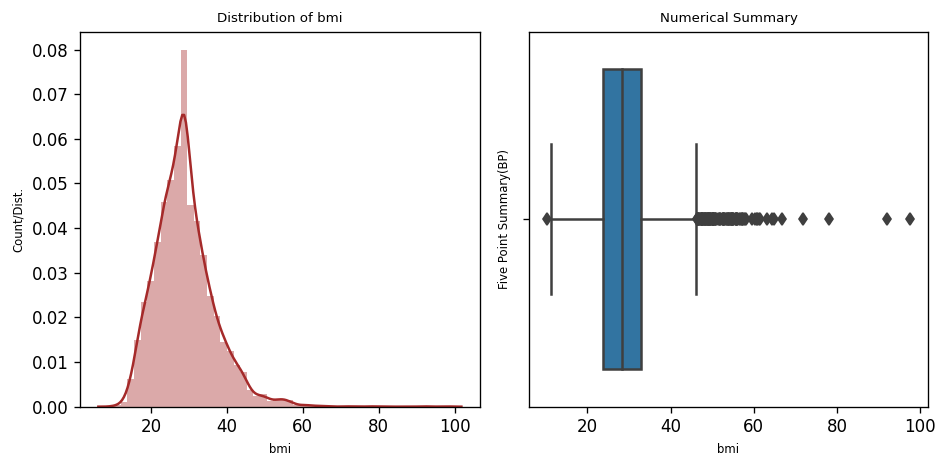

In [16]:
histogramAndBoxPlot(stroke_dataset, 'bmi')

Los analisis de bmi indican que los valores sobre 35 es obesidad extrema. Hay que analizar en el dataset si puede que algunos valores esten mal ingresados o no tengan sentido.

### Edad

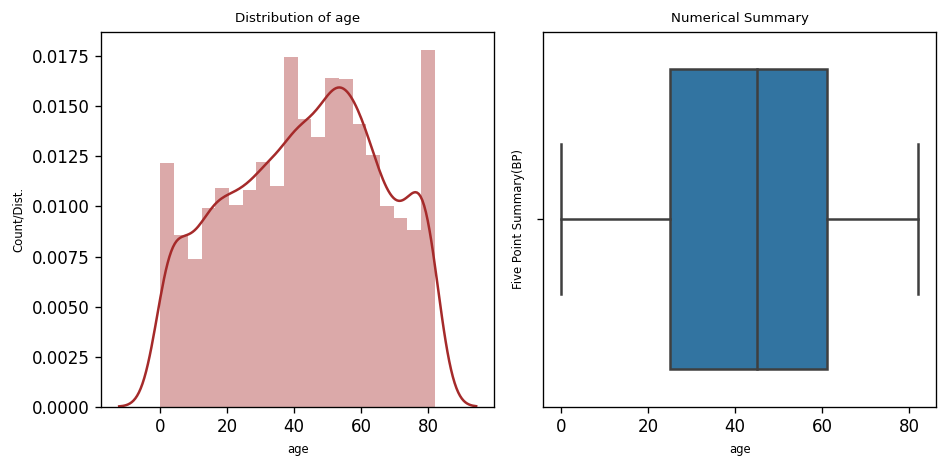

In [17]:
histogramAndBoxPlot(stroke_dataset, 'age')

### Nivel de Glucosa

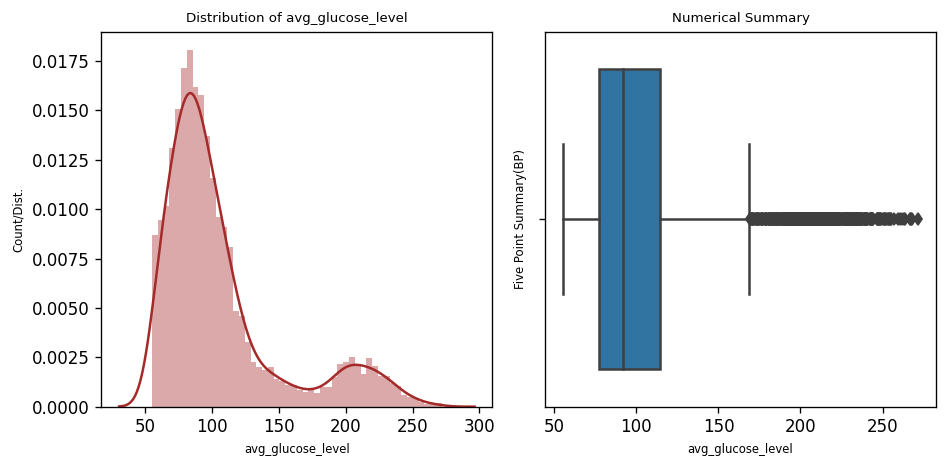

In [18]:
histogramAndBoxPlot(stroke_dataset, 'avg_glucose_level')

A continuación realizamos unos gráficos de torta de 3 variables, para así poder analizar la distribución de dichas variables categoricas:
- Género (gender)
- Hipertensión (hypertension)
- Enfermedades cardíacas (heart_disease)

### Género

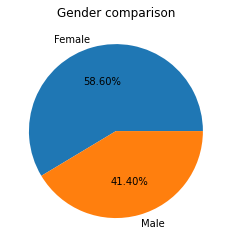

In [19]:
GenderComparison = stroke_dataset.groupby('gender').count()['stroke']

plt.pie(x=GenderComparison, labels=GenderComparison.index, autopct='%1.2f%%')
plt.title('Gender comparison')
plt.show()

### Hipertensión

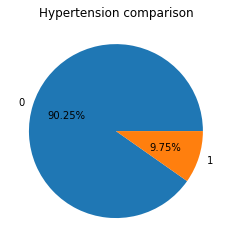

In [20]:
HypertensionComparison = stroke_dataset.groupby('hypertension').count()['stroke']

plt.pie(x=HypertensionComparison, labels=HypertensionComparison.index, autopct='%1.2f%%')
plt.title('Hypertension comparison')
plt.show()

### Enfermedades cardíacas

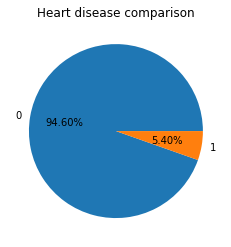

In [21]:
HeartDiseaseComparison = stroke_dataset.groupby('heart_disease').count()['stroke']

plt.pie(x=HeartDiseaseComparison, labels=HeartDiseaseComparison.index, autopct='%1.2f%%')
plt.title('Heart disease comparison')
plt.show()

## Distribución de Frecuencias

Para finalizar el análisis univariado, realizamos una tabla de distribución de frecuencias de todas las variables categóricas y la variable objetivo. A fin de realizar dicha tabla, creamos una función auxiliar.

In [22]:
def frequencyTable(stroke_dataset, variable):
    frec = stroke_dataset[variable].value_counts()
    frec_df = pd.DataFrame(frec)
    frec_df.rename(columns={variable:'Frec_abs'},inplace=True)
    Frec_abs_val = frec_df["Frec_abs"].values
    acum = []
    valor_acum = 0
    for i in Frec_abs_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_abs_acum"] = acum
    frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(stroke_dataset[variable]),4)
    Frec_rel_val = frec_df["frec_rel_%"].values
    acum = []
    valor_acum = 0
    for i in Frec_rel_val:
        valor_acum = valor_acum + i
        acum.append(valor_acum)
    frec_df["frec_rel_%_acum"] = acum
    display(frec_df)

### Smoking status

In [23]:
frequencyTable(stroke_dataset, 'smoking_status')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
never smoked         1892           1892     37.0327          37.0327
Unknown              1544           3436     30.2212          67.2539
formerly smoked       884           4320     17.3028          84.5567
smokes                789           5109     15.4433         100.0000

### Género

In [24]:
frequencyTable(stroke_dataset, 'gender')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
Female      2994           2994     58.6025          58.6025
Male        2115           5109     41.3975         100.0000

### Hipertensión

In [25]:
frequencyTable(stroke_dataset, 'hypertension')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      4611           4611     90.2525          90.2525
1       498           5109      9.7475         100.0000

### Enfermedades cardíacas

In [26]:
frequencyTable(stroke_dataset, 'heart_disease')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      4833           4833     94.5978          94.5978
1       276           5109      5.4022         100.0000

### Estado Civil

In [27]:
frequencyTable(stroke_dataset, 'ever_married')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
Yes      3353           3353     65.6293          65.6293
No       1756           5109     34.3707         100.0000

### Tipo de trabajo

In [28]:
frequencyTable(stroke_dataset, 'work_type')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
Private            2924           2924     57.2323          57.2323
Self-employed       819           3743     16.0305          73.2628
children            687           4430     13.4469          86.7097
Govt_job            657           5087     12.8597          99.5694
Never_worked         22           5109      0.4306         100.0000

### Tipo de residencia

In [29]:
frequencyTable(stroke_dataset, 'Residence_type')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
Urban      2596           2596     50.8123          50.8123
Rural      2513           5109     49.1877         100.0000

### ACV

In [30]:
frequencyTable(stroke_dataset, 'stroke')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      4860           4860     95.1262          95.1262
1       249           5109      4.8738         100.0000

# Análisis Bivariado

En este análisis realizaremos 2 tipos de gráficos para comparar de a 2 variables. Para hacer esto creamos 2 funciones auxiliares.

In [31]:
def boxPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.boxplot(dataset[target], dataset[variable], palette = 'viridis')
    plt.title(f'{target} vs {variable}', fontsize = 20)
    plt.show()

def violinPlotComparison(dataset, target, variable):
    plt.rcParams['figure.figsize'] = (12, 9)
    sns.violinplot(dataset[target], dataset[variable], palette = 'colorblind')
    plt.title(f'Relación entre {variable} y {target}', fontsize = 20, fontweight = 30)
    plt.show()

Procedemos a reemplazar valores númericos dentro de las variables categoricas para poder realizar el heatmap

In [32]:
stroke_dataset.stroke = stroke_dataset.stroke.replace({0:'Non-Stroke',1:'Stroke'})
stroke_dataset.heart_disease = stroke_dataset.heart_disease.replace({0:'No',1:'Yes'})
stroke_dataset.hypertension = stroke_dataset.hypertension.replace({0:'No',1:'Yes'})
stroke_dataset.head()

gender   age hypertension heart_disease ever_married      work_type  \
0    Male  67.0           No           Yes          Yes        Private   
1  Female  61.0           No            No          Yes  Self-employed   
2    Male  80.0           No           Yes          Yes        Private   
3  Female  49.0           No            No          Yes        Private   
4  Female  79.0          Yes            No          Yes  Self-employed   

  Residence_type  avg_glucose_level   smoking_status  stroke        bmi  
0          Urban             228.69  formerly smoked  Stroke  36.600000  
1          Rural             202.21     never smoked  Stroke  28.893237  
2          Rural             105.92     never smoked  Stroke  32.500000  
3          Urban             171.23           smokes  Stroke  34.400000  
4          Rural             174.12     never smoked  Stroke  24.000000

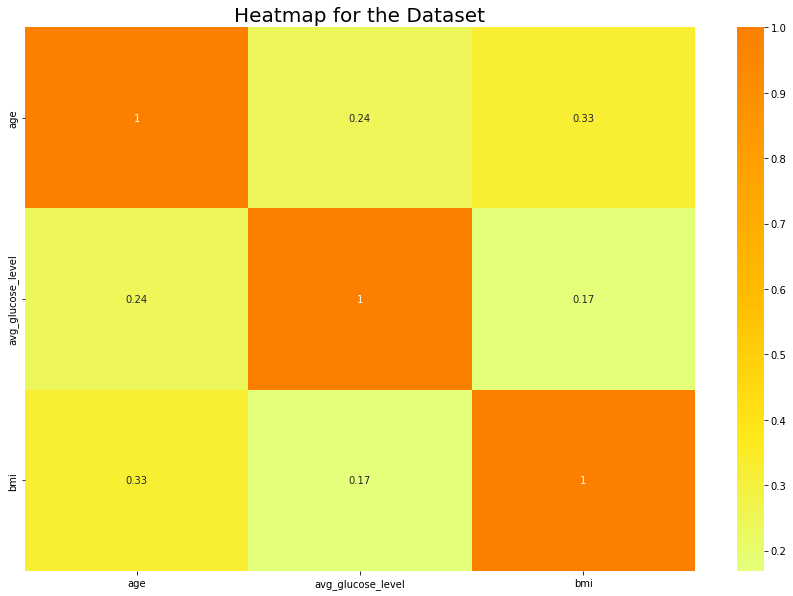

In [33]:
#HeatMap del df
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(stroke_dataset.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Númerica vs Categórica

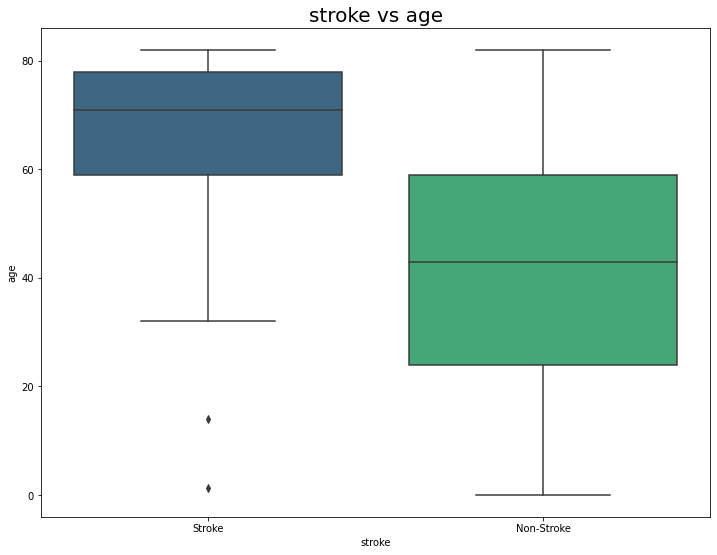

In [34]:
# age vs target
boxPlotComparison(stroke_dataset,'stroke','age')

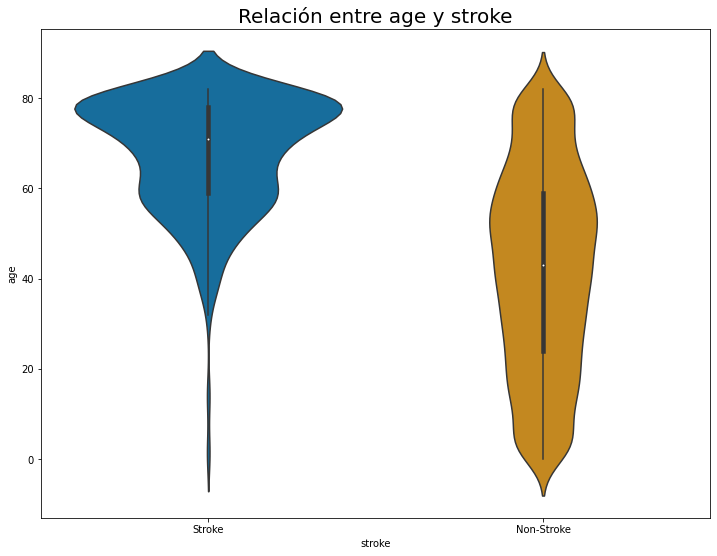

In [35]:
# age vs target
violinPlotComparison(stroke_dataset, 'stroke', 'age')

Podemos apreciar una clara influencia de la edad en las personas que sufrieron un stroke

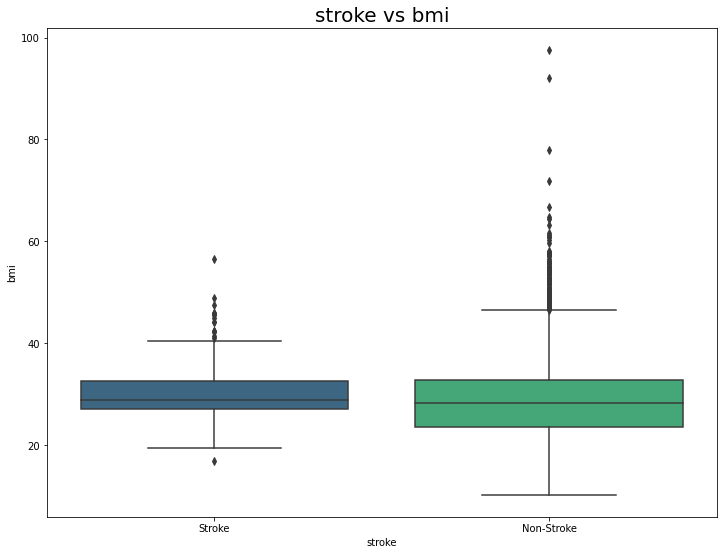

In [36]:
# bmi vs target
boxPlotComparison(stroke_dataset,'stroke','bmi')

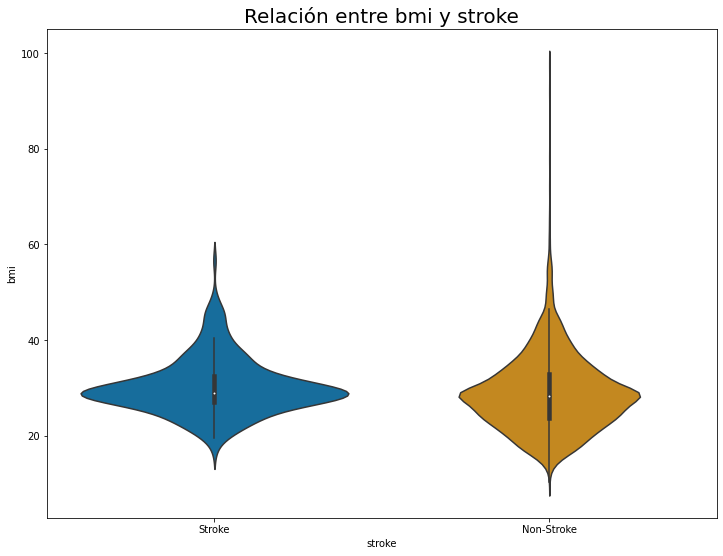

In [37]:
# bmi vs target
violinPlotComparison(stroke_dataset, 'stroke', 'bmi')

En este caso no podemos visualizar una influencia del bmi en la variable stroke

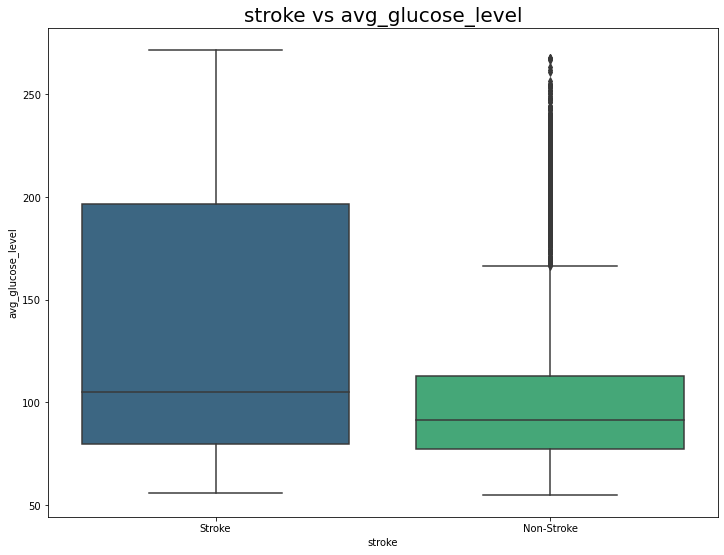

In [38]:
# avg_glucose_level vs target
boxPlotComparison(stroke_dataset,'stroke','avg_glucose_level')

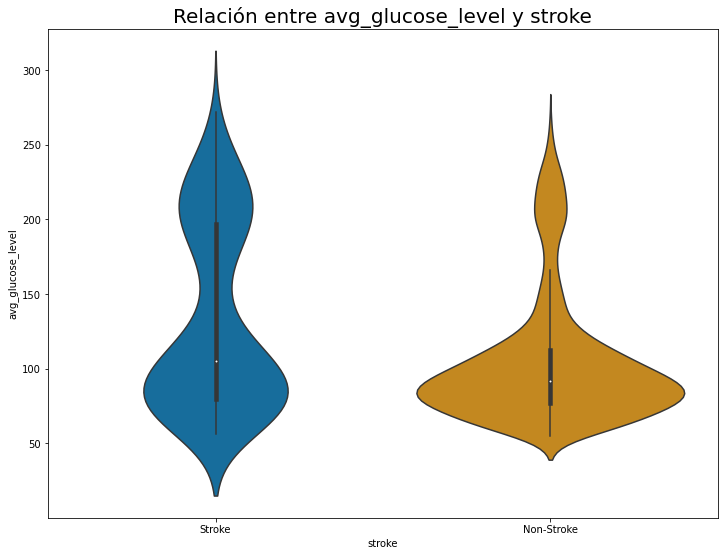

In [39]:
# avg_glucose_level vs target
violinPlotComparison(stroke_dataset, 'stroke', 'avg_glucose_level')

Acá podemos apreciar una leve influencia de la variable avg_glucose_level (nivel de glucosa en sangre) sobre si una persona tuvo un stroke o no, la mayoría de los sujetos con un avg_glucose_level superior a 100 tuvieron un stroke.

## Categórica vs. categórica

In [40]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['ever_married'])

ever_married    No   Yes
stroke                  
Non-Stroke    1727  3133
Stroke          29   220

In [41]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['ever_married'], normalize=True) 

ever_married        No       Yes
stroke                          
Non-Stroke    0.338031  0.613232
Stroke        0.005676  0.043061

Podemos apreciar que aquellos sujetos que se casaron alguna vez tienen significativamente más probabilidades de sufrir un stroke frente aquellos que nunca lo hicieron

In [42]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['smoking_status'])

smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
Non-Stroke         1497              814          1802     747
Stroke               47               70            90      42

In [43]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['smoking_status'], normalize=True)

smoking_status   Unknown  formerly smoked  never smoked    smokes
stroke                                                           
Non-Stroke      0.293012         0.159327      0.352711  0.146213
Stroke          0.009199         0.013701      0.017616  0.008221

En esta ocasión no podemos sacar conclusiones definitorias según los datos

In [44]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['work_type'])

work_type   Govt_job  Never_worked  Private  Self-employed  children
stroke                                                              
Non-Stroke       624            22     2775            754       685
Stroke            33             0      149             65         2

In [45]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['work_type'],normalize=True)

work_type   Govt_job  Never_worked   Private  Self-employed  children
stroke                                                               
Non-Stroke  0.122137      0.004306  0.543159       0.147583  0.134077
Stroke      0.006459      0.000000  0.029164       0.012723  0.000391

Acá podemos obsbervar que aquellos pertenecientes a la categoria "self-employed" tienen en cierta medida mayor probabilidad de sufrir un stroke frente a las demás categorias

In [46]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['heart_disease'])

heart_disease    No  Yes
stroke                  
Non-Stroke     4631  229
Stroke          202   47

In [47]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['heart_disease'],normalize=True)

heart_disease        No       Yes
stroke                           
Non-Stroke     0.906440  0.044823
Stroke         0.039538  0.009199

En esta ocasión la tendencia es clara, aquellos que sufren una enfermedad del corazón tienen significativamente más probabilidades de sufrir un stroke

In [48]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['hypertension'])

hypertension    No  Yes
stroke                 
Non-Stroke    4428  432
Stroke         183   66

In [49]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['hypertension'], normalize=True)

hypertension        No       Yes
stroke                          
Non-Stroke    0.866706  0.084557
Stroke        0.035819  0.012918

Aquí también podemos apreciar una tendencia similar a la de heart_disease, donde aquellos que sufren de hipertensión son más propensos a padecer un stroke

In [50]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['gender'])

gender      Female  Male
stroke                  
Non-Stroke    2853  2007
Stroke         141   108

In [51]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['gender'], normalize=True)

gender        Female      Male
stroke                        
Non-Stroke  0.558426  0.392836
Stroke      0.027598  0.021139

Acá no podemos evidenciar tendencia alguna entre los géneros frente a la variable stoke

In [52]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['Residence_type'])

Residence_type  Rural  Urban
stroke                      
Non-Stroke       2399   2461
Stroke            114    135

In [53]:
pd.crosstab(stroke_dataset['stroke'], stroke_dataset['Residence_type'], normalize=True)

Residence_type     Rural     Urban
stroke                            
Non-Stroke      0.469564  0.481699
Stroke          0.022314  0.026424

Cómo en el caso anterior, no podemos encontrar una tendencia notoria entre las categorias frente a la variable stroke

# Análisis Multivariado

### Distribución entre los generos en función del BMI

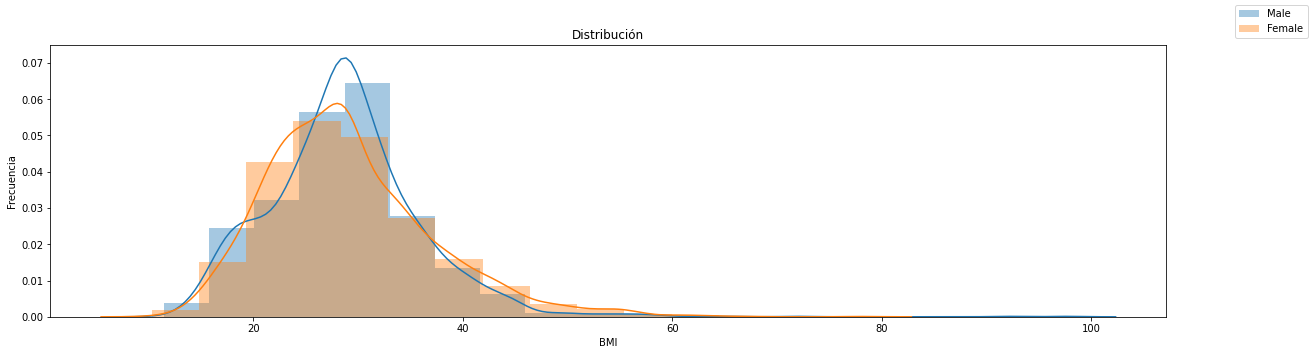

In [54]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].bmi, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].bmi, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Podemos observar que el nivel de BMI de los hombres se distribuye de una manera mas normal que el de las mujeres.\
La mayor concentracion de BMI en hombres se haya aproximadamente en 30, mientras que el de las mujeres se distribuye mas equitativamente entre 20 y 30.\
Hay una ligera concentracion mayor en las mujeres de BMI mayor a 40 en relacion a los hombres, pero el genero masculino es el de outliers mas marcados.

### Representacion de la relacion entre niveles de glucosa y BMI diferenciado por genero

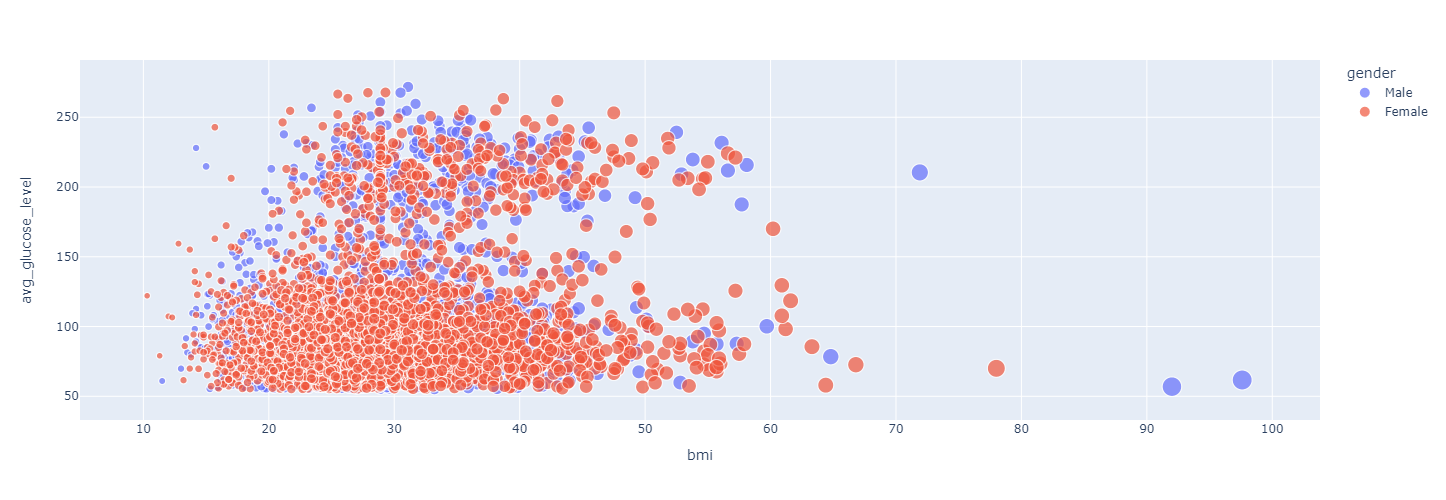

In [55]:
fig = px.scatter(stroke_dataset, x="bmi", y="avg_glucose_level",color='gender',size='bmi', width=1100, height=500)
fig.show()

El grafico desea mostrar que relacion puede llegar a haber entre nivel de glucosa y BMI.\
Si bien en el grafico no podemos inferir una relacion lineal entre ambas, siendo un valor determinado de BMI asociado generalmente a un intervalo especifico, la medicina ha demostrado que hay una directa correlacion entre un BMI elevado y un nivel de glucosa elevado. Un nivel de glucosa elevado conlleva a diabetes, y se da generalmente en persona de BMI elevado con una ingesta exagerada de azucares procesados.

### Distribución entre los generos en función del nivel de glucosa

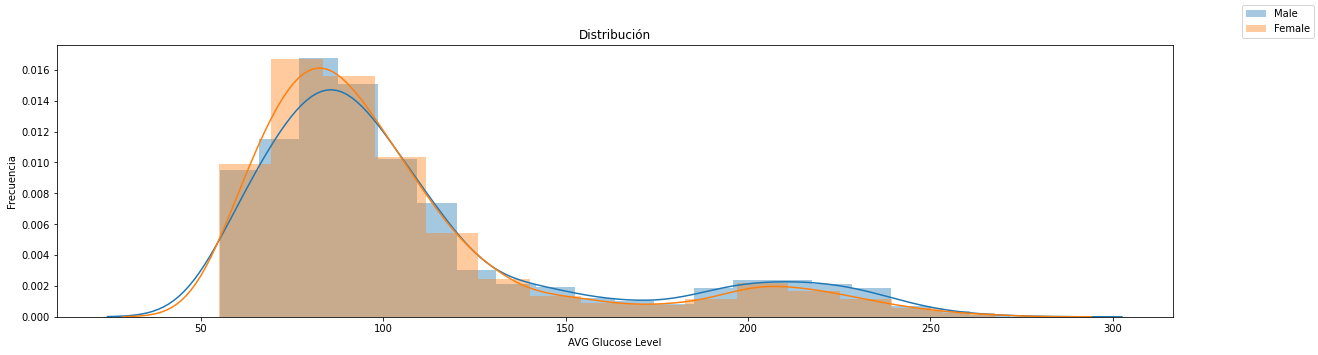

In [56]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.gender == 'Male'].avg_glucose_level, kde=True, hist=True, bins=20, label='Male')
sns.distplot(stroke_dataset[stroke_dataset.gender == 'Female'].avg_glucose_level, kde=True, hist=True, bins=15, label='Female')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Ambos generos se distribuyen de manera muy similar, con la mayoria de los integrantes del dataset encontrandose entre los valores 60-100 de glucosa.

### Distribución entre los diferentes tipos de trabajo en función del nivel de glucosa

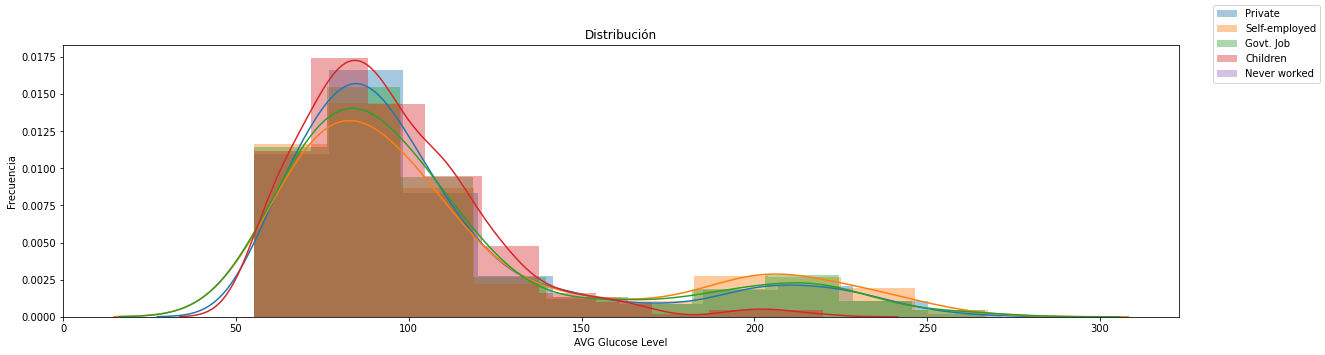

In [57]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].avg_glucose_level, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].avg_glucose_level, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].avg_glucose_level, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].avg_glucose_level, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].avg_glucose_level, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El grafico intenta mostrar la diferencia en base a los tipos de trabajo. Es facil inferir que los ninos tienen un menor nivel de glucosa en general, y que los self employed son el grupo de personas de cola mas pesada.

### Distribución entre los diferentes tipos de trabajo en función del BMI

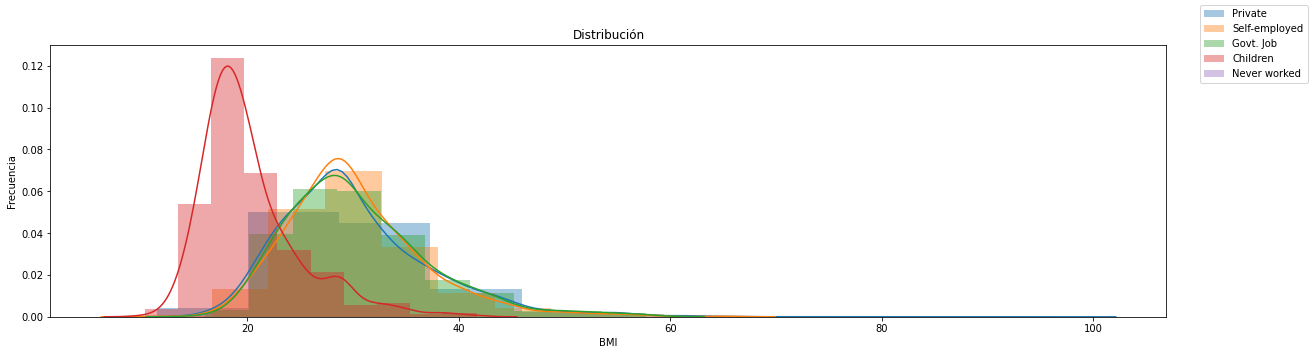

In [58]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Private'].bmi, kde=True, hist=True, bins=10, label='Private')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Self-employed'].bmi, kde=True, hist=True, bins=10, label='Self-employed')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'Govt_job'].bmi, kde=True, hist=True, bins=10, label='Govt. Job')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'children'].bmi, kde=True, hist=True, bins=10, label='Children')
sns.distplot(stroke_dataset[stroke_dataset.work_type == 'never_worked'].bmi, kde=True, hist=True, bins=10, label='Never worked')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Este grafico a diferencia del anterior utiliza el BMI como indicador. El mismo patron se repite en los ninos, siendo este grupo el de menor BMI.
El resto de los grupos se distribuyen similarmente.

### Distribución entre los diferentes residencias en función del nivel de glucosa

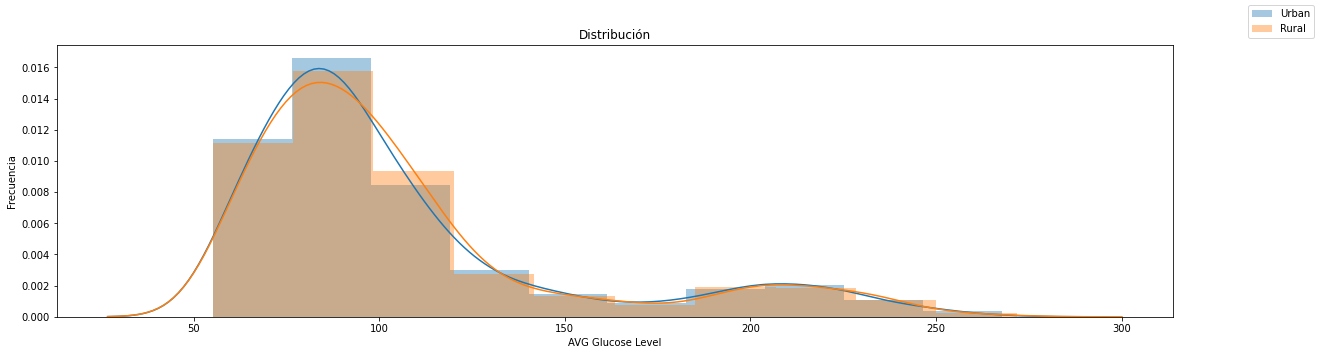

In [59]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].avg_glucose_level, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].avg_glucose_level, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('AVG Glucose Level')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

Se observan diferencias despreciables entre residentes urbanos y rurales con respecto a sus niveles de glucosa.

### Distribución entre los diferentes residencias de trabajo en función del BMI

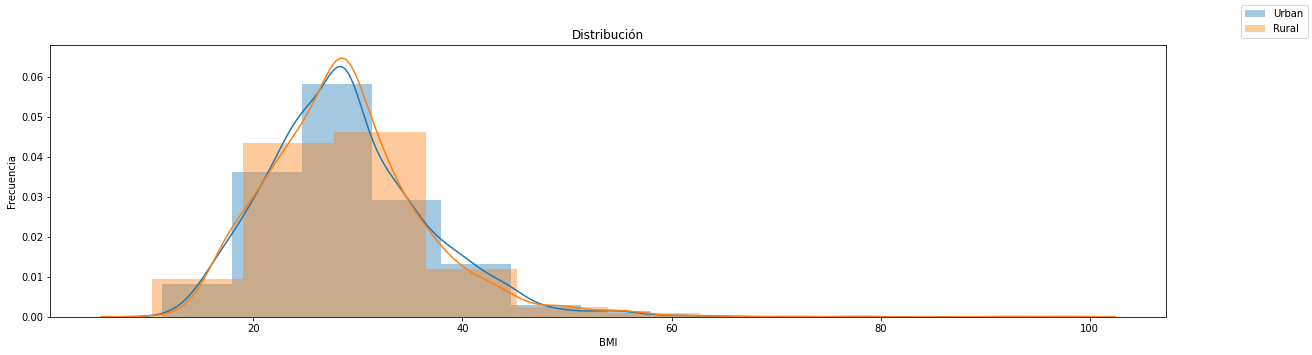

In [60]:
fig = plt.figure(figsize=(20,5))

sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Urban'].bmi, kde=True, hist=True, bins=10, label='Urban')
sns.distplot(stroke_dataset[stroke_dataset.Residence_type == 'Rural'].bmi, kde=True, hist=True, bins=10, label='Rural')

fig.legend()
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución')

plt.show()

El BMI nos indica que tampoco no hay diferencias de distribucion con respecto a la zona de residencia.

### Análisis del tipo de trabajo

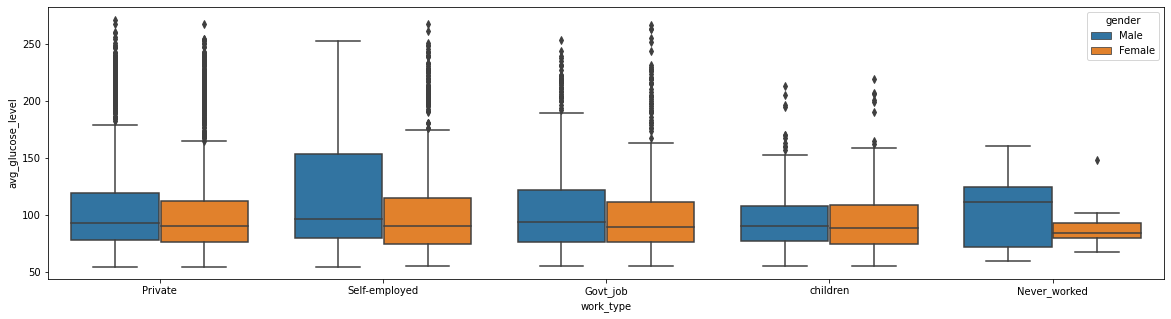

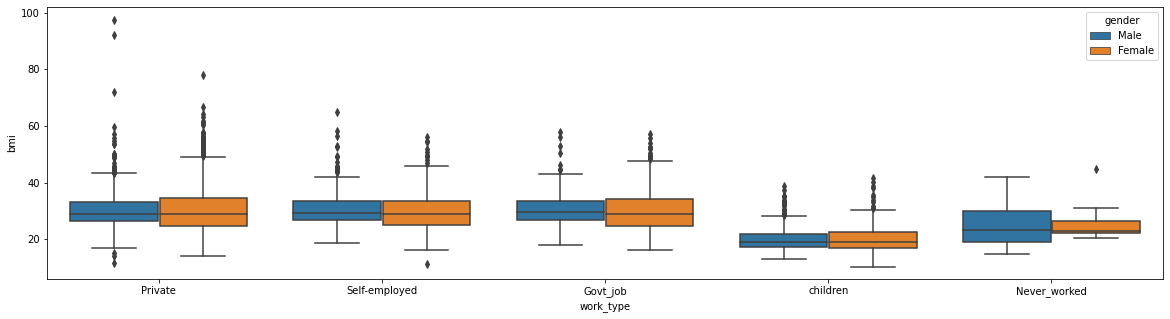

In [61]:
plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='work_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis del tipo de trabajo

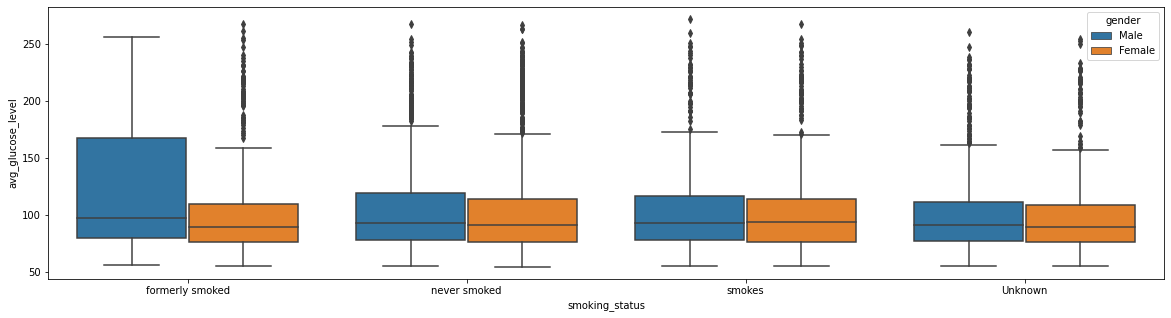

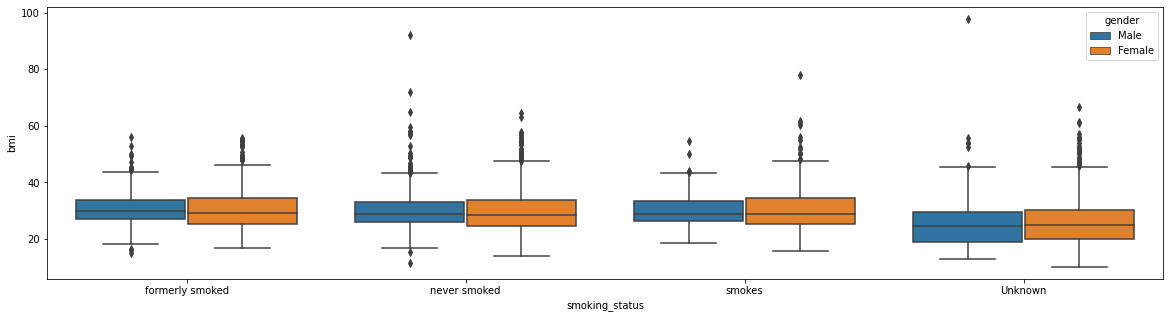

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='smoking_status',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

### Análisis en función de donde vive la gente

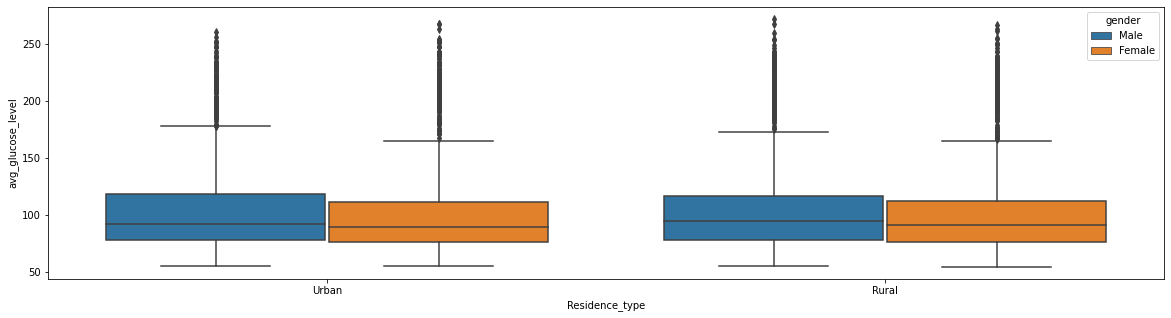

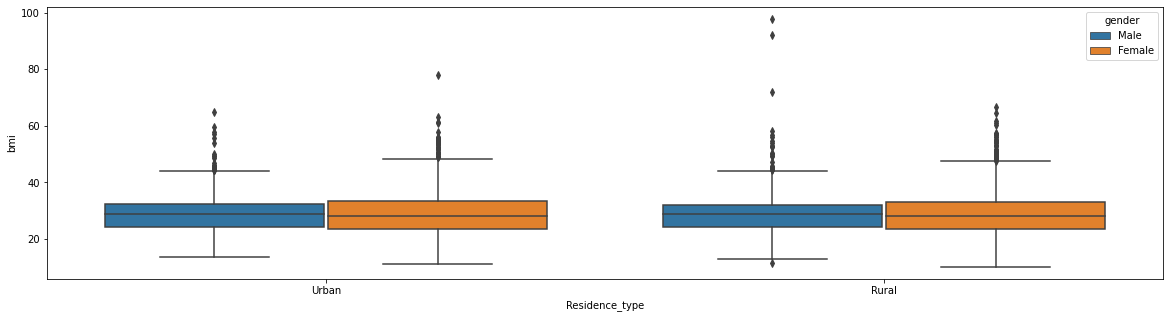

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="avg_glucose_level",data=stroke_dataset,hue='gender')
plt.show()

plt.figure(figsize=(20,5))
sns.boxplot(x='Residence_type',y="bmi",data=stroke_dataset,hue='gender')
plt.show()

# Modelos de clasificacion

Un modelo de clasificación nos permite poder clasificar datos en un conjunto finito de categorias. En contraste con los de regresión, no se busca predecir un numero real.\
El objetivo es predecir un resultado de caracter binario, es decir si es hombre/mujer, gator/perro, ganador/noganador, etc. En nuestro caso, el resultado categorico que queremos predecir es si No va a sufrir un Stroke (ACV), o si.

#### Antes de comenzar con el modelo, debemos hacer algunos ajustes en el dataset. 
Los modelos de clasificacion requieren convertir las variables categoricas en variables numericas, que catalogamos como "dummies".\
Este procedimiento nos permite utilizar dichas variables en los modelos, que solo aceptan inputs numericos. Por lo que debemos reconvertir las variables categoricas que utilizamos para los graficos, en numericas.

In [64]:
stroke_dataset.stroke = stroke_dataset.stroke.replace({'Non-Stroke':0,'Stroke':1})
stroke_dataset.heart_disease = stroke_dataset.heart_disease.replace({'No':0,'Yes':1})
stroke_dataset.hypertension = stroke_dataset.hypertension.replace({'No':0,'Yes':1})
stroke_dataset["gender"].replace({"Male": 1, "Female": 0}, inplace=True)
stroke_dataset["Residence_type"].replace({"Rural": 0, "Urban": 1}, inplace=True)
stroke_dataset["ever_married"].replace({"Yes": 1, "No": 0}, inplace=True)

stroke_dataset = pd.get_dummies(stroke_dataset, columns=['smoking_status'])
stroke_dataset = stroke_dataset.drop("smoking_status_Unknown", axis = 1)
stroke_dataset = pd.get_dummies(stroke_dataset, columns=['work_type'])
stroke_dataset = stroke_dataset.drop("work_type_Never_worked", axis = 1)

In [65]:
stroke_dataset.head()

gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  67.0             0              1             1               1   
1       0  61.0             0              0             1               0   
2       1  80.0             0              1             1               0   
3       0  49.0             0              0             1               1   
4       0  79.0             1              0             1               0   

   avg_glucose_level  stroke        bmi  smoking_status_formerly smoked  \
0             228.69       1  36.600000                               1   
1             202.21       1  28.893237                               0   
2             105.92       1  32.500000                               0   
3             171.23       1  34.400000                               0   
4             174.12       1  24.000000                               0   

   smoking_status_never smoked  smoking_status_smokes  work_type_Govt_job  \
0                            0                      0                   0   
1                            1                      0                   0   
2                            1                      0                   0   
3                            0                      1                   0   
4                            1                      0                   0   

   work_type_Private  work_type_Self-employed  work_type_children  
0                  1                        0                   0  
1                  0                        1                   0  
2                  1                        0                   0  
3                  1                        0                   0  
4                  0                        1                   0

#### Procedemos a separar el dataset de la variable objetivo

In [66]:
X1 = stroke_dataset.drop(["stroke"], axis=1)
Y1 = stroke_dataset["stroke"]

#### Ahora separamos en los sets de entrenamiento y prueba

In [67]:
(X1_train, X1_test,
 Y1_train, Y1_test) = train_test_split(X1,
                            Y1,
                            stratify=Y1,
                            test_size=0.20,
                            random_state=11)

Utilizaremos el 20% de nuestro dataset para entrenar el modelo, y al seleccionar el mismo random_state para todos los modelos, podemos ser homogeneos en la capacidad de prediccion de cada modelo. Ya que todos van a tratar con el mismo subset de datos.

### Vamos a utilizar distintos modelos de clasificacion.

#### Aclaraciones Generales

##### Aclaraciones sobre la Matriz de Confusion

La matriz esta invertida.\
Si es True Negative (1er cuadrante), estimo un No Stroke, cuando no lo era.\
Si es False Positive (2do cuadrante), estimo un Stroke, cuando no lo era.\
Si es False Negative (3er cuadrante), estimo un No Stroke, cuando lo era.\
Si es True Positive (4to cuadrante), estimo un Stroke, cuando era Stroke.

##### Aclaraciones sobre ROC Curve Analisis

Una curva de ROC curves delinea los positivos verdaderos en el eje "Y", y los falsos positivos en el eje "X".\
Es una herramienta grafica que nos ayuda a observar la efectividad del modelo.\
La zona superior izquierda es la zona "ideal", donde la tasa de falsos positivos es cero, y la tasa de positivos verdaderos es uno.

### KNN (K-Nearest Neighbour)

Este modelo de Machine Learning supervisado utiliza un concepto de determinacion en el environment. Los valores de los data points, se determinan por los data points cercanos. Haciendo una analogia para entender el concepto, las personas son afectadas, influenciadas, por las personas que los rodean.
El modelo mide la distancia entre los distintos data points, y los agrupa en base a clases. Los puntos de dichas clases, tienen una gran cantidad de caracteristicas en comun, por eso son agrupados dentro de esas especificas clases. Es importante conocer bien el dataset y realizar las visualizaciones correctas, para entender cuantas clases existen dentro de nuestro dataset. De dicha manera vamos a poder realizar una clasificacion mas fidedigna.

In [68]:
model1 = KNeighborsClassifier(n_neighbors=8).fit(X1_train, Y1_train)
print("Accuracy for our training dataset is : {:.2f}%".format(model1.score(X1_test, Y1_test)*100) )

Accuracy for our training dataset is : 95.11%


Confusion Matrix:
[[972   0]
 [ 50   0]]


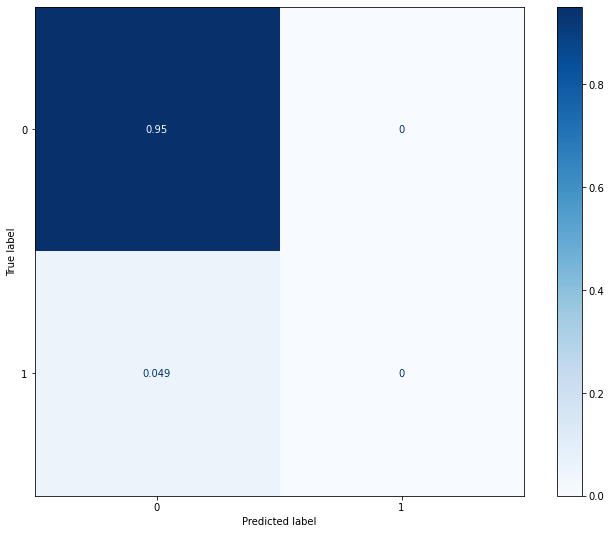

In [69]:
#Matriz de Confusión
Y1_test_pred = model1.predict(X1_test)
print("Confusion Matrix:")
print(confusion_matrix(Y1_test, Y1_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model1, X1_test, Y1_test, normalize ='all', cmap = 'Blues')
plt.show()

In [70]:
frequencyTable(stroke_dataset, 'stroke')

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      4860           4860     95.1262          95.1262
1       249           5109      4.8738         100.0000

In [71]:
Y1_test.value_counts()

0    972
1     50
Name: stroke, dtype: int64

##### ROC Curve K-Nearest Neighbor 

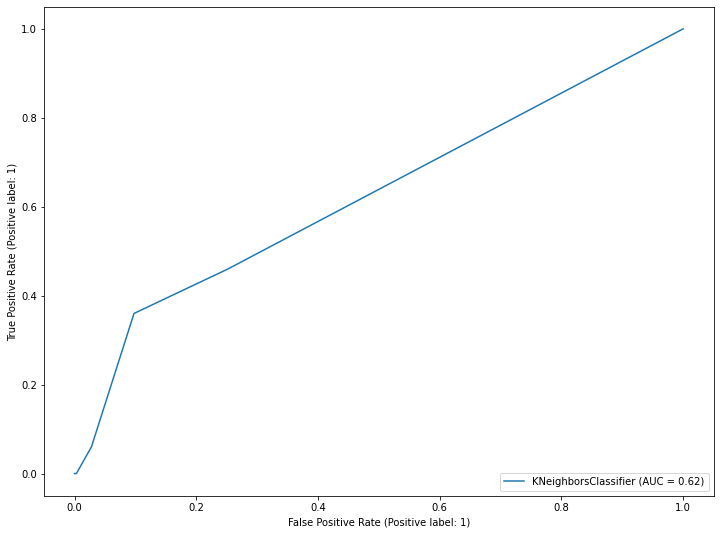

In [72]:
knn_disp = RocCurveDisplay.from_estimator(model1, X1_test, Y1_test)
plt.show()

#### Conclusiones de KNN

De la matriz de confusion podemos extraer algunas conclusiones. Cuando realizamos el train test split, seleccionamos al azar, el 20% de nuestro data set.\
Nuestro modelo es muy efectivo en la prediccion  de True Negatives, ya que obtenemos un 95.11%. Son casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
Observando el dataset, y la proporcion de Stroke/No Stroke, en conjunto con la matriz de confusion, podemos dilucidar una limitacion del modelo. La limitacion reside en el caso de los False Negative (3er cuadrante), estimo un No Stroke, cuando Si lo era. Esta metrica es muy importante, dado que siempre que realmente una persona sufra un Stroke, el modelo debe predecirlo para tratar y prevenir.\
Hay 50 casos de este tipo en el subset que utilizamos para entrenar el modelo, y no pudimos predecir ninguno.\
Esta limitacion genera un riesgo de salud, si se utilizara este modelo como input en un Hospital, ya que no tiene la capacidad de realmente predecir un Stroke en las situaciones en las que sucede.\
La curva ROC lo demuestra. Cuando el valor de AUC es aproximadamente 0.5, el model no tiene la capacidad de distinguir entre clases positivas y negativas.

#### Un metodo para mejorar la accuracy del modelo, es analizar exhaustivamente la cantidad de KNeighbors (hyperparameters) a elegir en base a las caracteristicas de nuestro dataset.

GridSearchCV es una herramienta que nos permite realizar especificamente esa tarea.

In [73]:
X2 = stroke_dataset.drop(["stroke"], axis=1)
Y2 = stroke_dataset["stroke"]
(X2_train, X2_test,
 Y2_train, Y2_test) = train_test_split(X2,
                            Y2,
                            stratify=Y2,
                            test_size=0.20,
                            random_state=11)

In [74]:
model2 = KNeighborsClassifier().fit(X2_train, Y2_train)
k_range = list(range(1, 100))
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(model2, param_grid, cv=10, scoring='accuracy', return_train_score= False, verbose=1)
  
# Fitting for grid search
grid_search = grid.fit(X2_train, Y2_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [75]:
print(grid_search.best_params_)

{'n_neighbors': 16}


In [76]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.91094432 0.94372693 0.93565248 0.94690481 0.94323553 0.94788461
 0.94543842 0.94984179 0.9491083  0.95033079 0.95033079 0.95082039
 0.95057529 0.95106489 0.95106489 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939
 0.95130939 0.95130939 0.95130939 0.95130939 0.95130939 0.9513

Text(0, 0.5, 'Cross-Validated Accuracy')

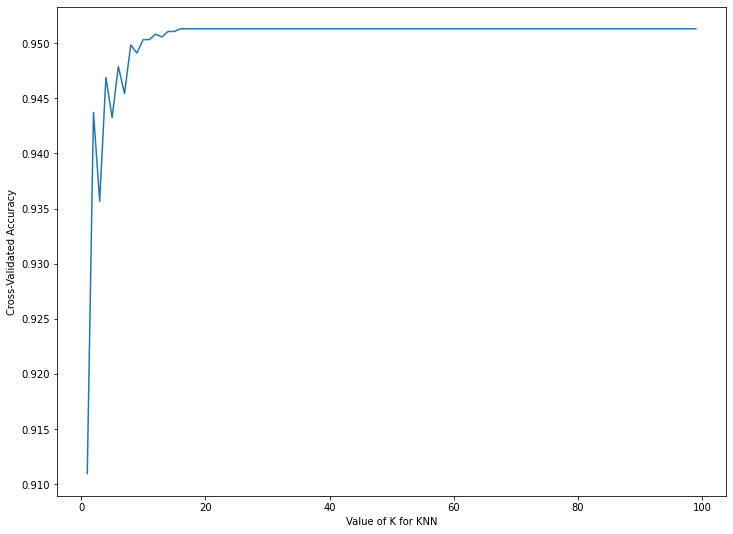

In [77]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [78]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9513093868354188
{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)


In [79]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 95.13%


Al programa le definimos un valor de K entre 1 y 100. Debido a que KNN es computacionalmente intenso, y lento mientras aumenta la base de datos, limita el approach y nos obliga a realizar una cantidad sensata de folds. Entre todos los valores de K, el mejor parametro es 16. Eso nos aumenta la estimacion en 0.02.

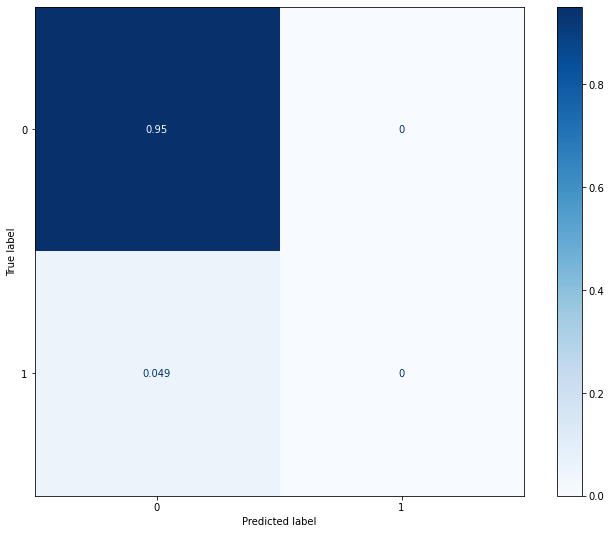

In [80]:
plot_confusion_matrix(grid,X2_train, Y2_train,normalize = 'all', cmap = 'Blues' )

Podemos ver una mejora en la capacidad de prediccion modelo, ya que obtenemos un 95.13% de True Negatives, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion. La mejora porcentual en la estimacion no implica un cambio nominal debido a que una mejora del 0.02%, en un subdataset de tan pocos individuos, no es significativo.

### Decision Tree

El concepto del modelo de Arboles de Decision (Decision Trees), es construir un arbol de nodes y branches, que constan de informacion y decisiones acorde a cual es el mejor camino para ajustar nuestro train set para lograr la mejor prediccion. Se construyen separando recursivamente nuestro train-set usando los features que mejor ajustan para nuestro objetivo.

In [81]:
X3DS = stroke_dataset.drop(["stroke"], axis=1)
Y3DS = stroke_dataset["stroke"]
(X3DS_train, X3DS_test,
 Y3DS_train, Y3DS_test) = train_test_split(X3DS,
                            Y3DS,
                            stratify=Y3DS,
                            test_size=0.2,
                            random_state=11)

##### Primero creamos un arbol de decisión sencillo, lo entrenamos y realizamos las predicciones.

In [82]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)

tree.fit(X3DS_train, Y3DS_train)

tree_test_pred = tree.predict(X3DS_test)

test3_accuracy = accuracy_score(Y3DS_test, tree_test_pred)
print("Accuracy for our training dataset with Decision Tree is : {:.2f}%".format(test3_accuracy*100))

Accuracy for our training dataset with Decision Tree is : 90.22%


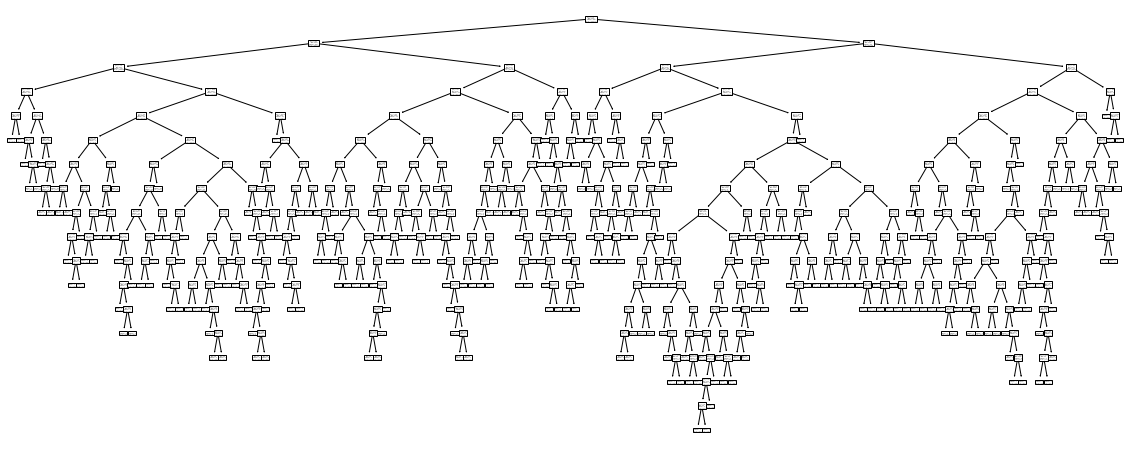

In [83]:
plt.figure(figsize=(20, 8), edgecolor = 'blue')
plot_tree(tree)
plt.show()

Confusion Matrix:
[[917  55]
 [ 45   5]]


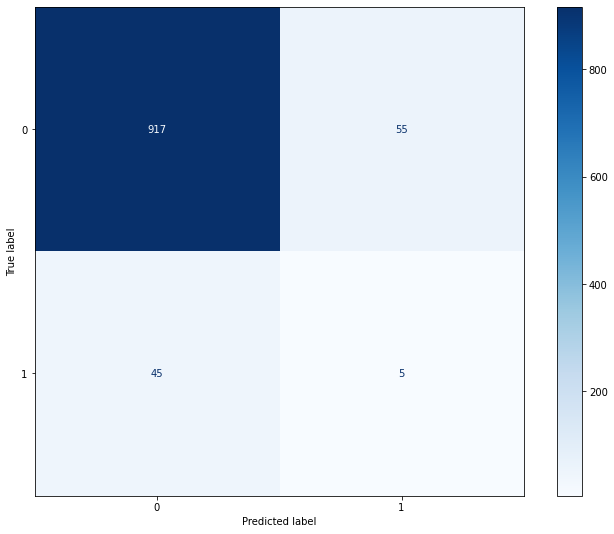

In [84]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(Y3DS_test, tree_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(tree, X3DS_test, Y3DS_test, normalize = None, cmap = 'Blues')
plt.show()

##### ROC Curve Decision Tree

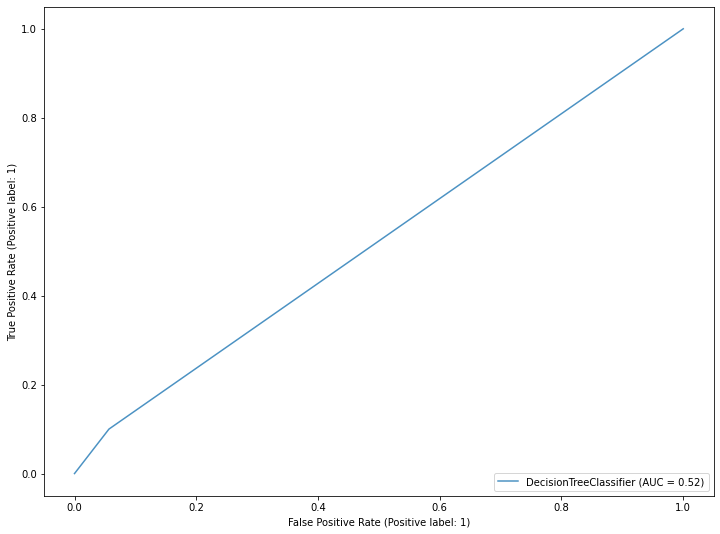

In [85]:
ax = plt.gca()
dtc_disp = RocCurveDisplay.from_estimator(tree, X3DS_test, Y3DS_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones Decision Tree

La capacidad de prediccion de True Negatives es del 90.22%, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion (1er cuadrante).\
Y los casos en los que predecimos un Stroke, y el dataset lo confirma (4to cuadrante).\
La limitacion esta en un elemento importante que nos demuestra la matriz de confusion. En 45 casos, el Arbol de Decision predice que esas personas No sufriran un Stroke, cuando realmente si lo sufren. Esta metrica es muy importante, define si nuestro modelo es capaz de predecir los casos de Stroke verdaderos. Ya sea porque predice un No stroke y No sucede (1er cuadrante), o porque predice un Stroke y sucede (4to cuadrante).\
Seguimos observando la limitacion de nuestros modelos en dicho caso.\
La curva ROC lo demuestra. Cuando el valor de AUC es aproximadamente 0.5, el model no tiene la capacidad de distinguir entre clases positivas y negativas.

### RandomForest

Random forest consiste en una gran cantidad de decision trees individual que operan como un ensemble. Cada tree individual define su prediccion de clase, y la clase con mas votos entre todos los arboles individuales, se vuelve la prediccion de nuestro modelo Random Forest.

In [86]:
X3 = stroke_dataset.drop(["stroke"], axis=1)
Y3 = stroke_dataset["stroke"]
(X3_train, X3_test,
 Y3_train, Y3_test) = train_test_split(X3,
                            Y3,
                            stratify=Y3,
                            test_size=0.2,
                            random_state=11)

In [87]:
#Creamos un random forest!
model3 = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model3.fit(X3_train, Y3_train)

Y3_test_pred = model3.predict(X3_test)

test3_accuracy = accuracy_score(Y3_test, Y3_test_pred)

print("Accuracy for our training dataset with RandomForest is : {:.2f}%".format(test3_accuracy*100))

Accuracy for our training dataset with RandomForest is : 94.81%


Confusion Matrix:
[[969   3]
 [ 50   0]]


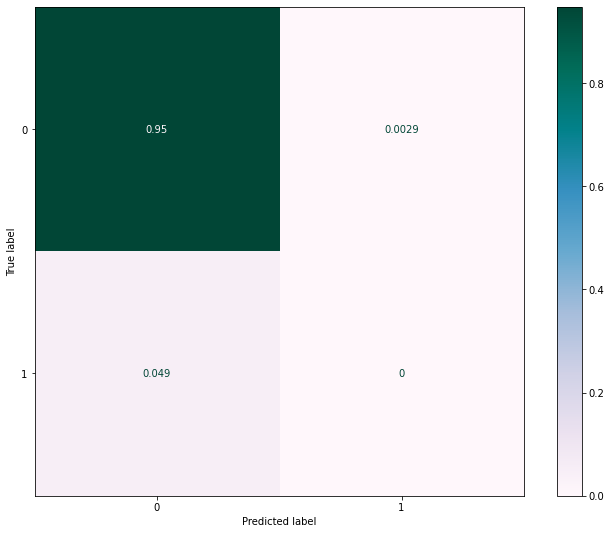

In [88]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(Y3_test, Y3_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model3, X3_test, Y3_test, normalize = 'all' , cmap = 'PuBuGn')
plt.show()

##### ROC Curve RandomForest

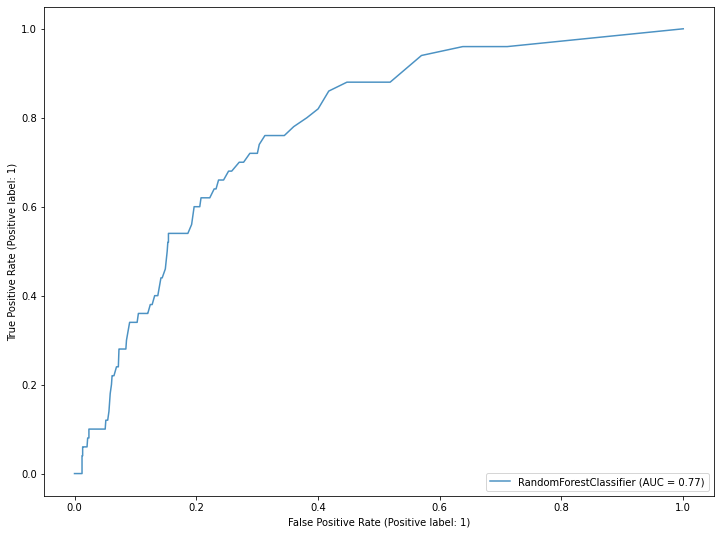

In [89]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model3, X3_test, Y3_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones RandomForest

De la matriz de confusion podemos extraer algunas conclusiones.\
Nuestro modelo es muy efectivo en la prediccion de True Negatives, ya que obtenemos un 94.81%, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
En este caso incurrimos en el error de False Positives con 3 individuos. Es el caso de estimar un Stroke, cuando no lo era. Esta limitacion no genera ningun riesgo de salud, ya que solo recaeria en gastos y atencion extra. A diferencia del KNN, este modelo si incurre en ese error.\
Comparado con Decision Tree, una mejoria en la capacidad de no incurrir en False Positives, estimar un Stroke cuando no lo era (55 DS vs 3 RF). Pero mas importante aun es observar que perdemos toda capacidad de predecir True Positives, casos en los que predecimos un Stroke, y se verifica (5 DS vs 0 RF).\
La curva ROC tiene una mejor pendiente, pero no es congruente con la matriz de confusion.

### Gradient Boosting Classifier

Gradient Tree Boosting Classifier es un modelo que nace del metodo de boosting, que consiste en crear un ensemble. Empieza por fittear un modelo inicial (en este caso un arbol de decision) a nuestra data. El segundo modelo se enfoca en predecir adecuadamente en los casos en los que el primer modelo tiene un mal rendimiento. Se espera que la combinacion de ambos modelos tenga un mejor rendimiento. Este proceso se repite, y cada modelo sucesivo intenta corregir las limitaciones de todos los anteriores.

In [90]:
X3GB = stroke_dataset.drop(["stroke"], axis=1)
Y3GB = stroke_dataset["stroke"]
(X3GB_train, X3GB_test,
 Y3GB_train, Y3GB_test) = train_test_split(X3GB,
                            Y3GB,
                            stratify=Y3GB,
                            test_size=0.2,
                            random_state=11)

In [91]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    model3GB = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_depth=1, random_state=11).fit(X3GB_train, Y3GB_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(model3GB.score(X3GB_train, Y3GB_train)))
    print("Accuracy score (validation): {0:.3f}".format(model3GB.score(X3GB_test, Y3GB_test)))

Learning rate:  0.05
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.075
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.1
Accuracy score (training): 0.951
Accuracy score (validation): 0.950
Learning rate:  0.25
Accuracy score (training): 0.951
Accuracy score (validation): 0.951
Learning rate:  0.5
Accuracy score (training): 0.952
Accuracy score (validation): 0.951
Learning rate:  0.75
Accuracy score (training): 0.953
Accuracy score (validation): 0.950
Learning rate:  1
Accuracy score (training): 0.954
Accuracy score (validation): 0.951


In [92]:
model3GB = GradientBoostingClassifier(n_estimators=200,learning_rate=1.0,max_depth=1,random_state=11).fit(X3GB_train, Y3GB_train)

In [93]:
Y3_test_predGB =model3GB.predict(X3GB_test)
test3_accuracyGB = accuracy_score(Y3GB_test, Y3_test_predGB)
print("Accuracy for GBC is : {:.2f}%".format(test3_accuracyGB*100))

Accuracy for GBC is : 95.11%


In [94]:
n_zeros3GB = np.count_nonzero(Y3GB_test==0)
n_ones3GB = np.count_nonzero(Y3GB_test==1)
# display the count of zeros
print(n_zeros3GB)
print(n_ones3GB)
print(n_zeros3GB+n_ones3GB)

972
50
1022


Confusion Matrix:
[[970   2]
 [ 48   2]]


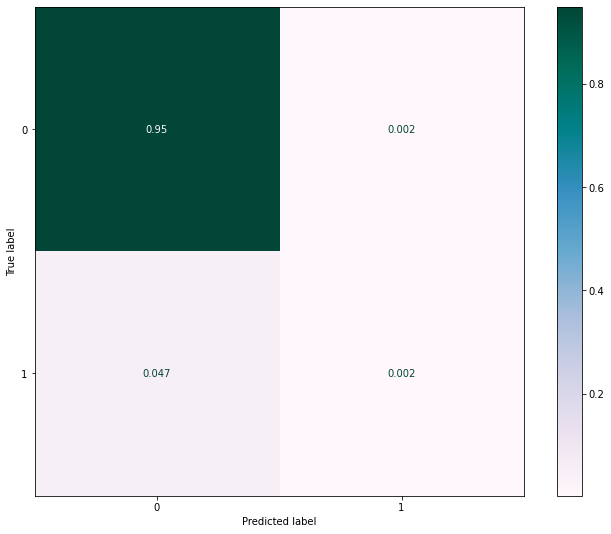

In [95]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(Y3GB_test, Y3_test_predGB))

#Ploteamos la Matriz
plot_confusion_matrix(model3GB, X3GB_test, Y3GB_test, normalize = 'all' , cmap = 'PuBuGn')
plt.show()

##### ROC Curve Gradient Boosting Classifier

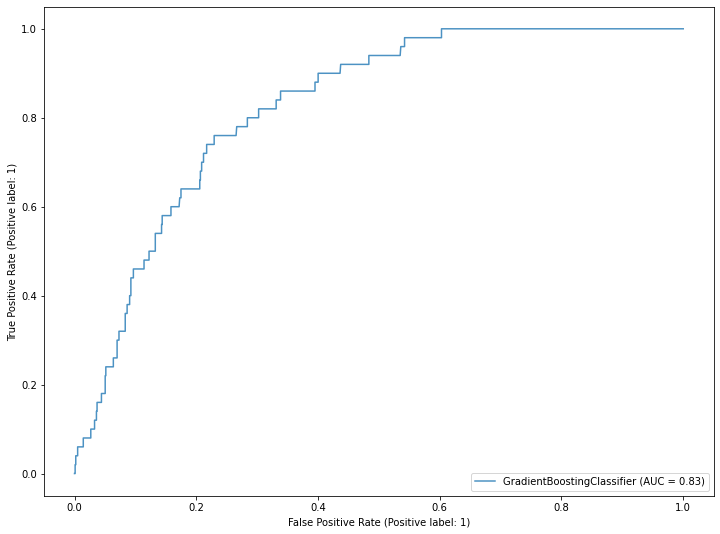

In [96]:
ax = plt.gca()
gbc_disp = RocCurveDisplay.from_estimator(model3GB, X3GB_test, Y3GB_test, ax=ax, alpha=0.8)
plt.show()

#### Conclusiones GBC (Gradient Boosting Classifier)

Junto con Decision Trees y Random Forest, GBC tambien incurre en el error de False Positive, situacion en la cual predecimos un Stroke, cuando no sucede. Esta metrica es relativamente importante, dada la importancia de predecir todos los casos verdaderos en los que una persona realmente Stroke. Se disminuye ligeramente dicho error, ya que solo observamos 2 casos.\
Es muy eficiente en la situacion de True Negatives (95.11%), casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion (1er cuadrante).\
A diferencia de Random Forest, este modelo si logra predecir 2 casos de True Positive, individuos que predecimos que tendran un Stroke, y se verifica.\
De todas maneras seguimos observando la limitacion de nuestros modelos en este caso. De 50 individuos que sufriran un Stroke, solo podemos predecir 2.

### SVC (Support Vector Classification)

Creamos el modelo SVM (support vector machine). Un support vector machine construye un hyper-plano, o una serie de hyper-planos en n dimensiones, que podemos utilizar para nuestro analisis de clasificacion. La matematica del modelo determina el mejor conjunto de vectores los cuales maximizan el margen entre los vectores (es decir maximizan la distancia entre los inputs y sus subclases) sin incurrir en misclasificar dicho sample, es decir sin adjudicar ese input en una subclase no optima.

In [97]:
X4 = stroke_dataset.drop(["stroke"], axis=1)
Y4 = stroke_dataset["stroke"]

X4_train, X4_test, Y4_train, Y4_test = train_test_split(
                                        X4,
                                        Y4.values.reshape(-1,1),
                                        train_size   = 0.2,
                                        random_state = 11,
                                        shuffle      = True
                                    )

In [98]:
model4 = SVC(C = 100, kernel = 'rbf', random_state=11)
model4.fit(X4_train, Y4_train)

SVC(C=100, random_state=11)

In [99]:
n_zeros4 = np.count_nonzero(Y4_train==0)
n_ones4 = np.count_nonzero(Y4_train==1)
# display the count of zeros
print(n_zeros4)
print(n_ones4)
print(n_zeros4+n_ones4)

976
45
1021


In [100]:
from sklearn.metrics import accuracy_score

Y4_train_pred = model4.predict(X4_train)
test4_accuracy = accuracy_score(Y4_train, Y4_train_pred)

# Accuracy
print("Accuracy of SVC is : {:.2f}%".format(test4_accuracy*100))

Accuracy of SVC is : 95.59%


Confusion Matrix:
[[976   0]
 [ 45   0]]


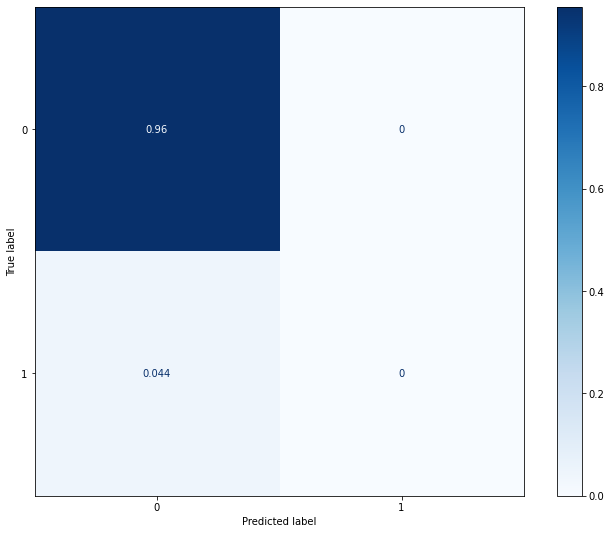

In [101]:
#Matriz de Confusión
print("Confusion Matrix:")
print(confusion_matrix(Y4_train, Y4_train_pred))

#Ploteamos la Matriz
plot_confusion_matrix(model4, X4_train, Y4_train, normalize = 'all' , cmap = 'Blues')
plt.show()

##### ROC Curve Support Vector Classification

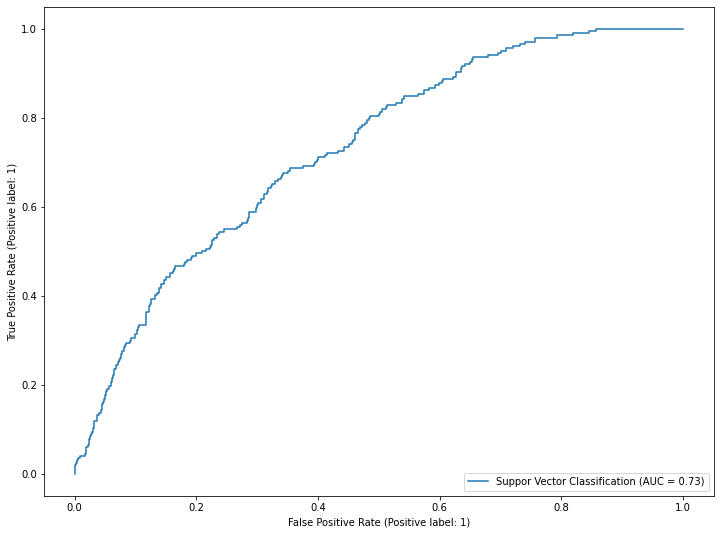

In [102]:
svc_disp = RocCurveDisplay.from_estimator(model4, X4_test, Y4_test, name ='Suppor Vector Classification')
plt.show()

#### Conclusiones SVC

Habiamos aclarado que la limitaciones de nuestras predicciones residen en el caso de los True Positive (4to cuadrante). Casos en los que predecimos un Stroke, y de hecho sufren un Stroke.\
El modelo SVC, continua con esa limitacion.\
Mejora la capacidad de prediccion de los True Negatives, casos en lo que predecimos un No Stroke, y el dataset confirma nuestra estimacion.\
Por ende no incurre en el error de False Positives, situacion en la cual predecimos un Stroke, cuando se da un No Stroke. 

### Conclusion de Modelos de Machine Learning

Utilizamos varios modelos de clasificacion.

1. KNN (K-Nearest Neighbor)
2. Decisition Tree
3. Random Forest
4. Gradient Boosting Classifier
5. SVC (Support Vector Classification)

Luego de implementar cada uno, realizamos los debidos analisis. La conclusion final es que el metodo GBC (Gradient Boosting Classifier) es el que obtiene mejores resultados.

In [103]:
print("Accuracy for GBC is : {:.2f}%".format(test3_accuracyGB*100))

Accuracy for GBC is : 95.11%


In [104]:
print("Confusion Matrix GBC:")
print(confusion_matrix(Y3GB_test, Y3_test_predGB))

Confusion Matrix GBC:
[[970   2]
 [ 48   2]]


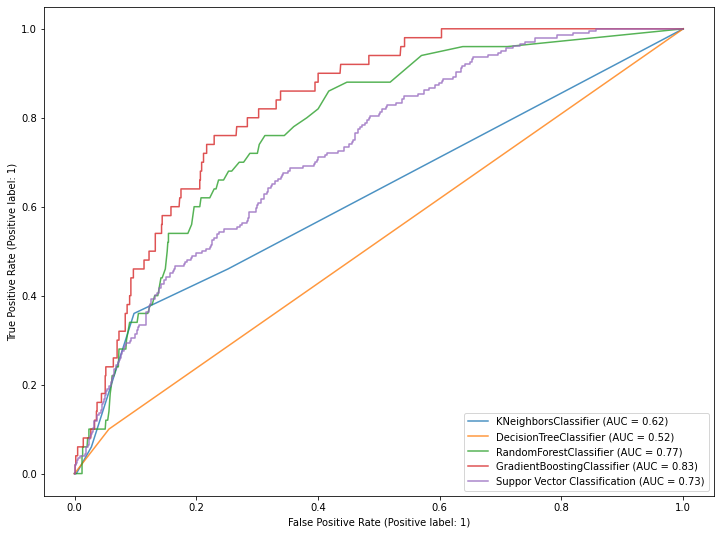

In [105]:
ax = plt.gca()
knn_disp.plot(ax=ax, alpha=0.8)
dtc_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
gbc_disp.plot(ax=ax, alpha=0.8)
svc_disp.plot(name = 'Suppor Vector Classification' ,ax=ax, alpha=0.8)

plt.show()

En todos los modelos obtuvimos resultados similares, lo que nos permitio observar la limitacion de nuestras predicciones, que siempre reside en el caso de los True Positives. Casos en los que predecimos un Stroke, cuando en verdad no sufren un Stroke.\
De todos los modelos, Decision Tree fue el que tuvo una mejor capacidad de predecir los True Positives (5 DS vs 2 GBC), pero incurre mucho en el error de False Positives, en el cual estimo un Stroke, cuando no lo era (55 DS vs 2 GBC).
El modelo GBC no es el de mejor capacidad de prediccion de los True Negatives, pero por un margen muy ligero (GBC 970 vs SVC 976).\
Si es el modelo de mejor curva ROC (AUC area under curve). La curva ROC es curva de probabilidades que grafica el ratio de verdaderos positivos contra lo falsos positivos, en varios threshold values.
Observando todos los modelos, sus curvas ROC, y ponderando sus limitaciones, creemos que en la mayoria de los casos, GBC deberia ser el que mejor ajuste.